In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    space_between_tiles = 2
    vertical = rows_count * tile_height + (rows_count - 1) * space_between_tiles
    horizontal = cols_count * tile_width + (cols_count - 1) * space_between_tiles
    img_matrix = np.empty(shape=(vertical, horizontal))
    img_matrix.fill(np.nan)
    
    for row in range(rows_count):
        for col in range(cols_count):
            row_start = row * (tile_height + space_between_tiles)
            col_start = col * (tile_width + space_between_tiles)
            img_matrix[row_start : (row_start + tile_height), col_start : (col_start + tile_width)] = examples[row, col]

    return img_matrix

## MNIST Dataset

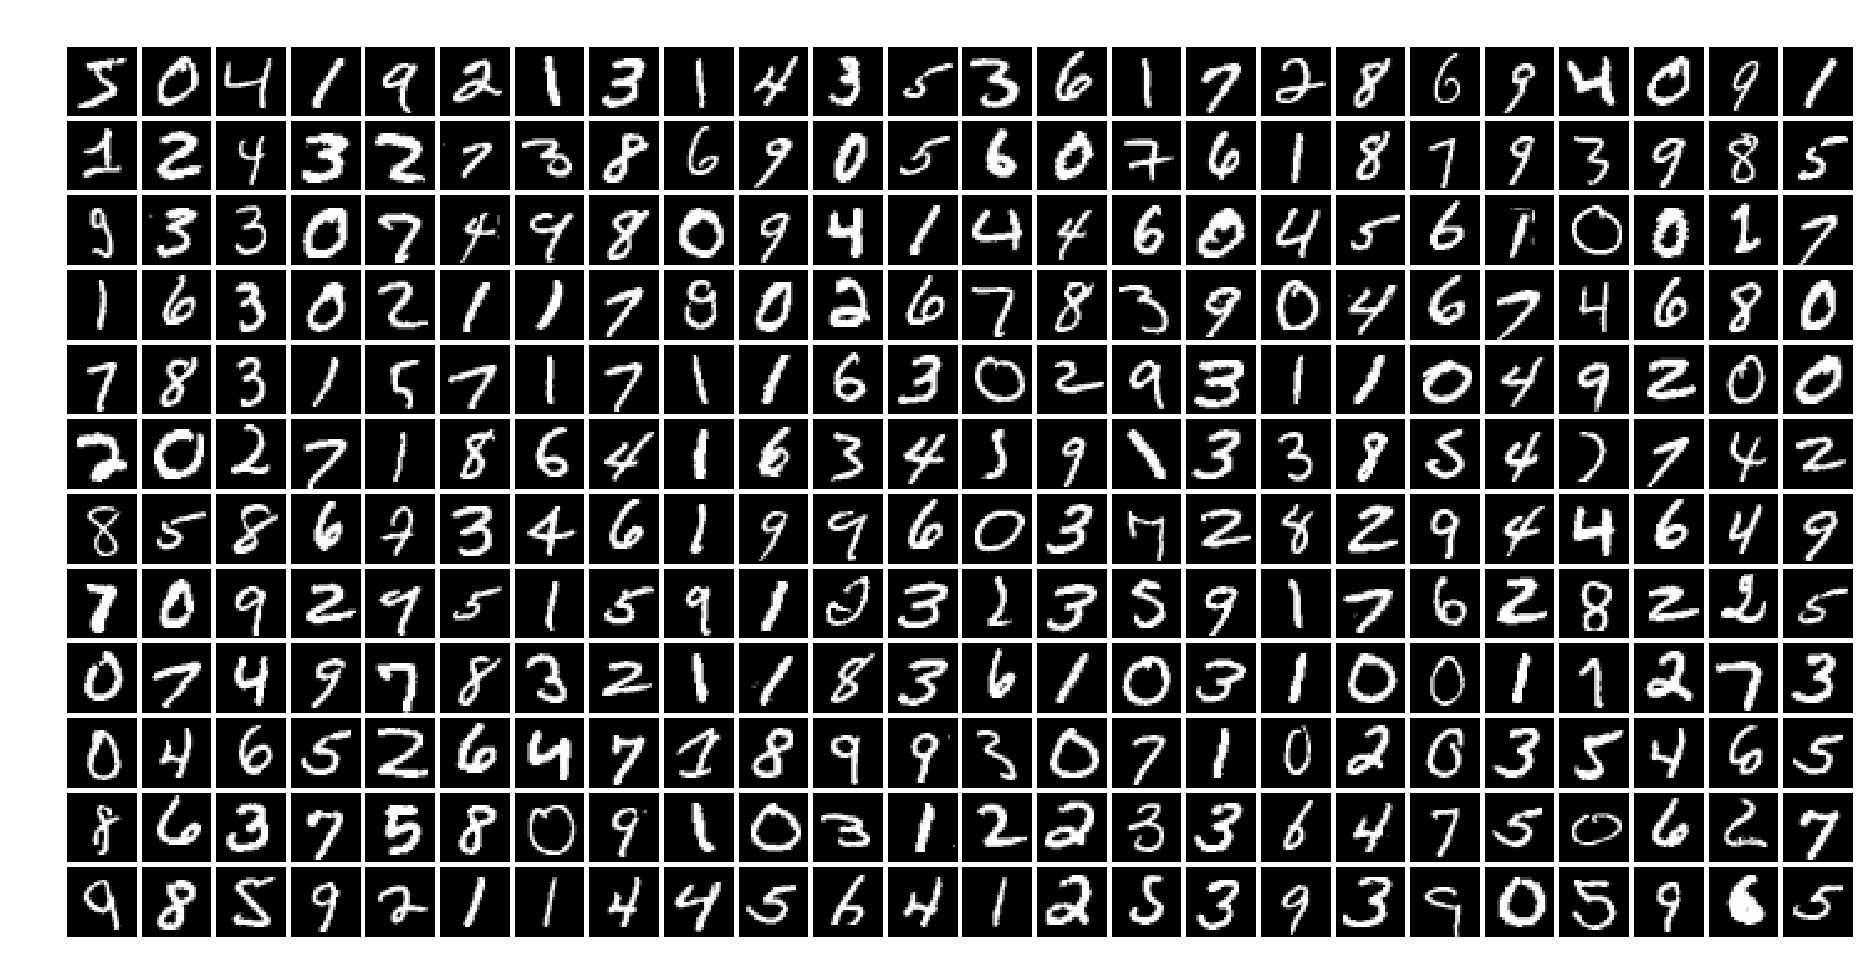

In [3]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [4]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
print(X.shape)
y.shape

(60000, 28, 28)


(60000,)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [5]:
X = X.reshape(60000, -1)

In [6]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [7]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = y == i
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label='label: %d' % i)

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [8]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [10]:
X_pca_embedded.shape

(2000, 2)

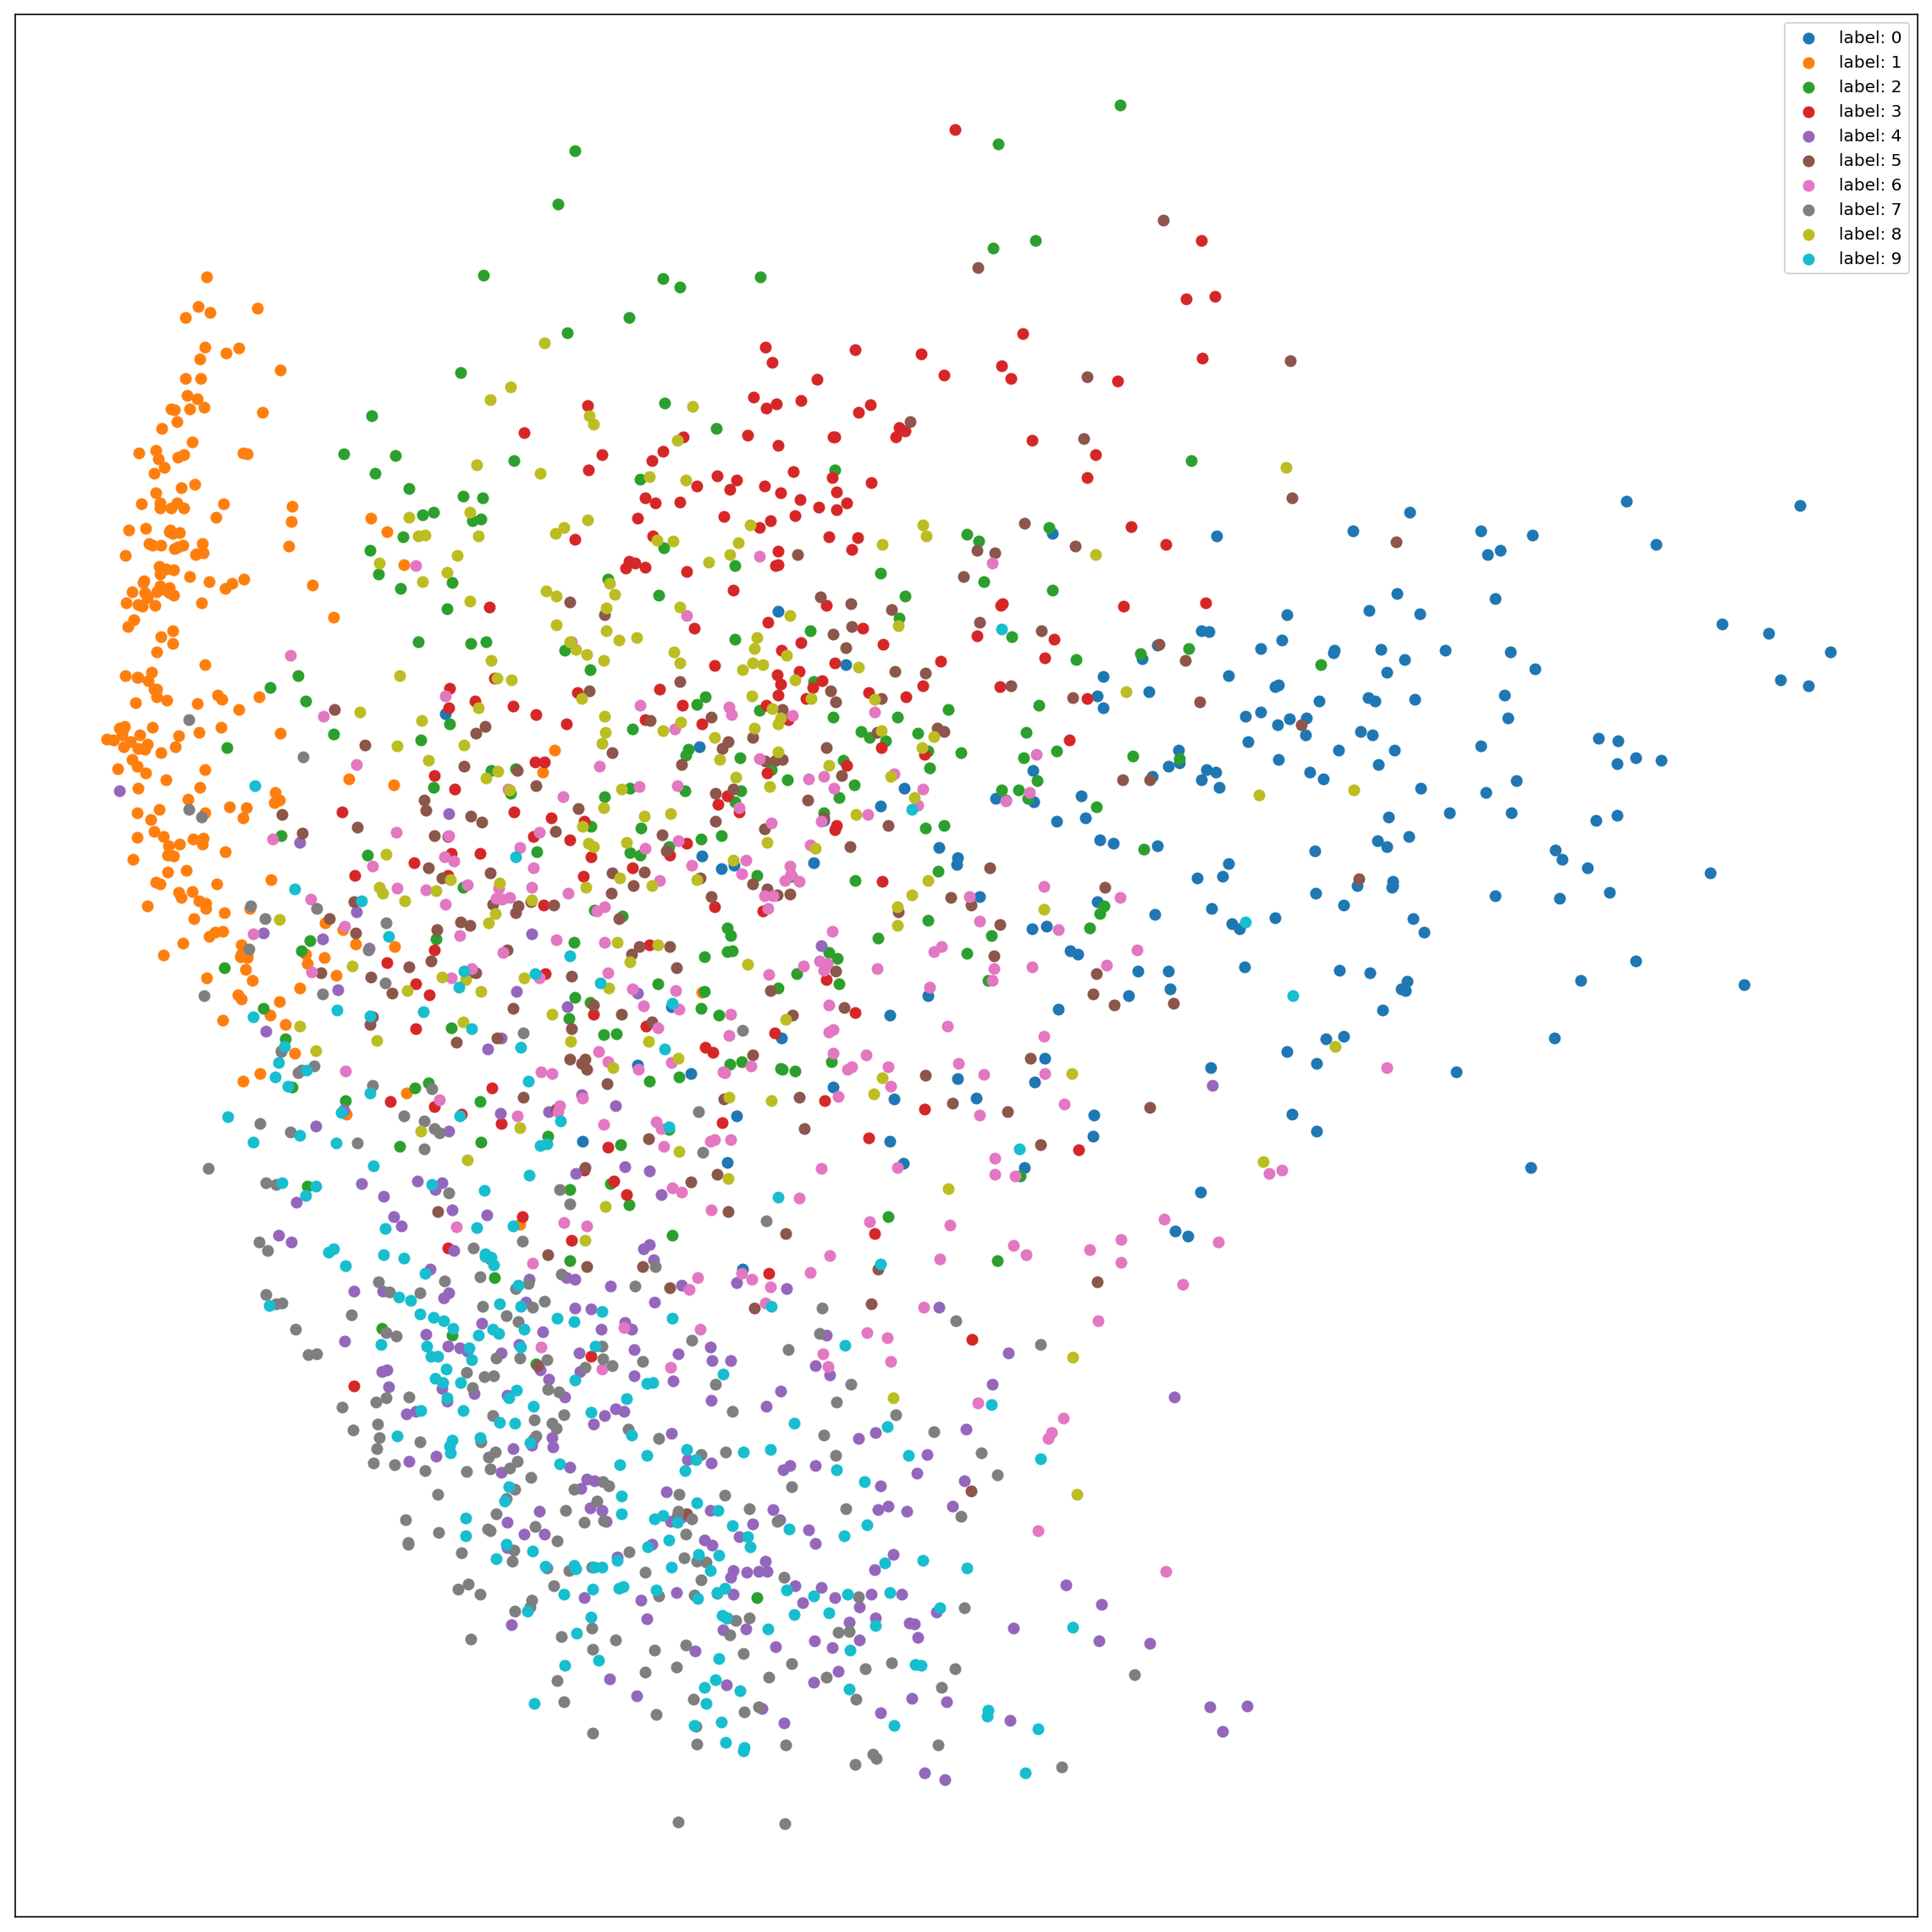

In [11]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.168s...
[t-SNE] Computed neighbors for 2000 samples in 17.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.188s
[t-SNE] Iteration 50: error = 78.0257187, gradient norm = 0.0036147 (50 iterations in 3.927s)
[t-SNE] Iteration 100: error = 75.8526611, gradient norm = 0.0245445 (50 iterations in 3.565s)
[t-SNE] Iteration 150: error = 75.6826019, gradient norm = 0.0037646 (50 iterations in 2.918s)
[t-SNE] Iteration 200: error = 75.6779327, gradient norm = 0.0060592 (50 iterations in 3.091s)
[t-SNE] Iteration 250: error = 75.6669769, gradient norm = 0.0139604 (50 iterations in 3.564s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.666977
[t-SNE] Iteration 300: error = 1.4867765, gradient norm = 0.0010267 (50 iterations in 3.301s

In [13]:
X_tsne_embedded.shape

(2000, 2)

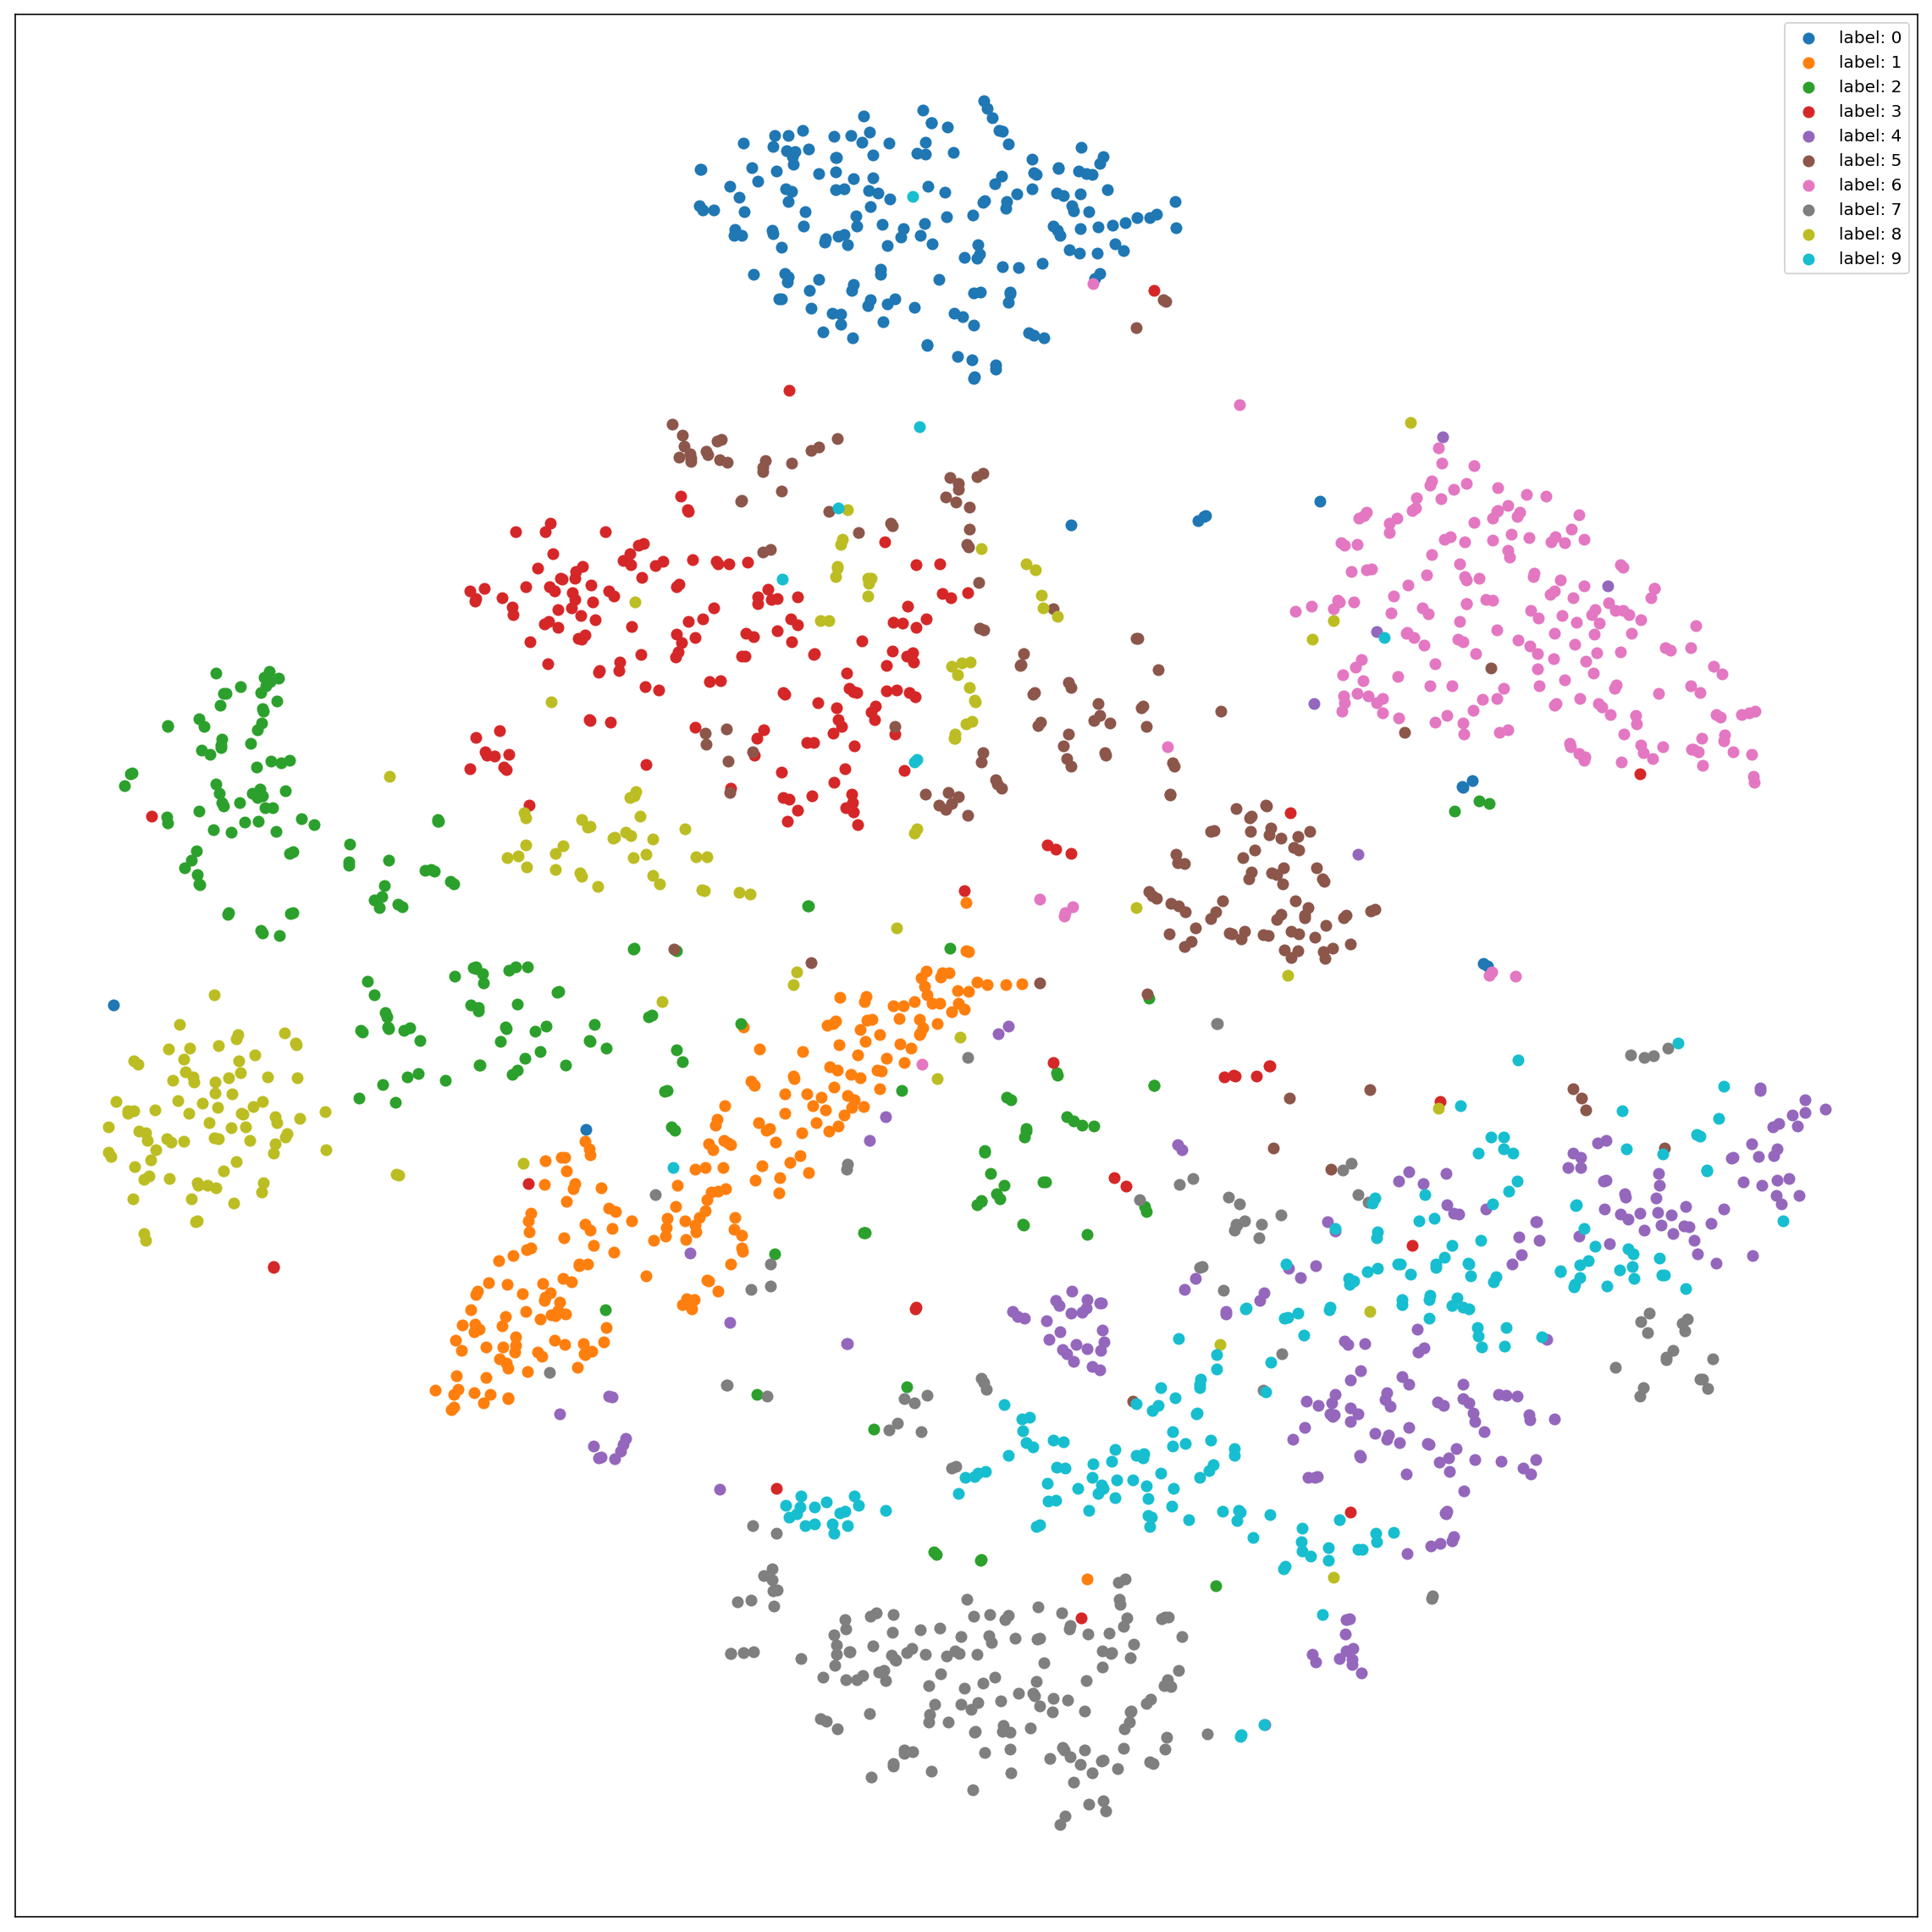

In [14]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [16]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small)

In [17]:
X_3d_pca_embedded.shape

(2000, 3)

In [18]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [19]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [20]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.93      0.98      0.96       200
          1       0.91      0.98      0.94       218
          2       0.90      0.84      0.87       191
          3       0.89      0.87      0.88       214
          4       0.86      0.94      0.89       186
          5       0.85      0.84      0.85       161
          6       0.93      0.95      0.94       206
          7       0.91      0.89      0.90       216
          8       0.92      0.81      0.87       205
          9       0.88      0.89      0.88       203

avg / total       0.90      0.90      0.90      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [22]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[196   0   1   2   0   0   0   0   1   0]
 [  0 213   1   0   1   3   0   0   0   0]
 [  4   3 160   1   4   2   5   4   7   1]
 [  2   3   6 187   0   7   0   3   2   4]
 [  0   0   0   0 174   0   0   1   1  10]
 [  3   3   0   7   5 136   4   0   3   0]
 [  0   0   2   0   5   3 196   0   0   0]
 [  1   7   3   0   6   0   0 192   0   7]
 [  2   4   3   8   3   9   5   1 167   3]
 [  2   1   1   4   5   0   0  10   0 180]]
